## Data Science Nigeria Staff Promotion Algorithm
Author:🧕🏿 Hasanat Owoseni\
Date : 25th September, 2019

### STEPS 
1. Import Libraies and Dataset
2. Merge the data set together (train and test)
3. change the way the column names are formatted: (uppercases to samller), no special char except underscore
4. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

### The Dataset 

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train.head(3)

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not
0,YAK/S/00001,Commercial Sales and Marketing,"MSc, MBA and PhD",Female,Direct Internal process,2,1986,12.5,2011,1,0,41,ANAMBRA,No,Married,No,No,0,0
1,YAK/S/00002,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,2,1991,12.5,2015,0,0,52,ANAMBRA,Yes,Married,No,No,0,0
2,YAK/S/00003,Commercial Sales and Marketing,First Degree or HND,Male,Direct Internal process,2,1987,7.5,2012,0,0,42,KATSINA,Yes,Married,No,No,0,0


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38312 entries, 0 to 38311
Data columns (total 19 columns):
EmployeeNo                             38312 non-null object
Division                               38312 non-null object
Qualification                          36633 non-null object
Gender                                 38312 non-null object
Channel_of_Recruitment                 38312 non-null object
Trainings_Attended                     38312 non-null int64
Year_of_birth                          38312 non-null int64
Last_performance_score                 38312 non-null float64
Year_of_recruitment                    38312 non-null int64
Targets_met                            38312 non-null int64
Previous_Award                         38312 non-null int64
Training_score_average                 38312 non-null int64
State_Of_Origin                        38312 non-null object
Foreign_schooled                       38312 non-null object
Marital_Status                         383

In [5]:
df_test.head(3)

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers
0,YAK/S/00005,Information Technology and Solution Support,First Degree or HND,Male,Agency and others,2,1976,7.5,2017,0,0,65,FCT,Yes,Married,No,No,1
1,YAK/S/00011,Information Technology and Solution Support,NaN,Male,Direct Internal process,2,1991,0.0,2018,0,0,69,OGUN,Yes,Married,No,No,1
2,YAK/S/00015,Research and Innovation,"MSc, MBA and PhD",Male,Direct Internal process,2,1984,7.5,2012,0,0,76,KANO,Yes,Married,No,No,1


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16496 entries, 0 to 16495
Data columns (total 18 columns):
EmployeeNo                             16496 non-null object
Division                               16496 non-null object
Qualification                          15766 non-null object
Gender                                 16496 non-null object
Channel_of_Recruitment                 16496 non-null object
Trainings_Attended                     16496 non-null int64
Year_of_birth                          16496 non-null int64
Last_performance_score                 16496 non-null float64
Year_of_recruitment                    16496 non-null int64
Targets_met                            16496 non-null int64
Previous_Award                         16496 non-null int64
Training_score_average                 16496 non-null int64
State_Of_Origin                        16496 non-null object
Foreign_schooled                       16496 non-null object
Marital_Status                         164

### Dataframe merging 
The test data frame doesn't include the Promoted_or_not column. \
The reason I'm merging it is so I can easily clean the test and train dataframe as a dataframe which is faster\ 
rather  than cleaning them individually.\

Hence, I will be adding the missing column `promoted_or_not` column. Populate it with a constant : `15`


In [7]:
 df_test['Promoted_or_Not'] = 15

In [8]:
df = pd.concat([df_train, df_test])

In [9]:
#remove the irregularity in the dataframe's column using string methods
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [10]:
df.sample(3)

,employeeno,division,qualification,gender,channel_of_recruitment,trainings_attended,year_of_birth,last_performance_score,year_of_recruitment,targets_met,previous_award,training_score_average,state_of_origin,foreign_schooled,marital_status,past_disciplinary_action,previous_intradepartmental_movement,no_of_previous_employers,promoted_or_not
17183,YAK/S/24519,Sourcing and Purchasing,First Degree or HND,Male,Direct Internal process,2,1989,10.0,2014,0,0,61,KANO,Yes,Married,No,No,0,0
11166,YAK/S/15837,Commercial Sales and Marketing,"MSc, MBA and PhD",Male,Direct Internal process,2,1987,7.5,2017,1,0,36,RIVERS,Yes,Married,No,No,0,0
3681,YAK/S/12524,Information and Strategy,First Degree or HND,Male,Direct Internal process,2,1984,5.0,2009,1,0,76,LAGOS,Yes,Married,No,Yes,More than 5,15


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54808 entries, 0 to 16495
Data columns (total 19 columns):
employeeno                             54808 non-null object
division                               54808 non-null object
qualification                          52399 non-null object
gender                                 54808 non-null object
channel_of_recruitment                 54808 non-null object
trainings_attended                     54808 non-null int64
year_of_birth                          54808 non-null int64
last_performance_score                 54808 non-null float64
year_of_recruitment                    54808 non-null int64
targets_met                            54808 non-null int64
previous_award                         54808 non-null int64
training_score_average                 54808 non-null int64
state_of_origin                        54808 non-null object
foreign_schooled                       54808 non-null object
marital_status                         548

### Get Unque Values in every column as well as the Numbers of unique values

In [12]:
print(len(df.marital_status.unique()), ':', df.marital_status.unique())

3 : ['Married' 'Single' 'Not_Sure']


In [13]:
print(len(df.division.unique()), ':', df.division.unique())

9 : ['Commercial Sales and Marketing' 'Customer Support and Field Operations'
 'Information and Strategy' 'Information Technology and Solution Support'
 'Sourcing and Purchasing' 'Business Finance Operations'
 'People/HR Management' 'Research and Innovation'
 'Regulatory and Legal services']


In [14]:
print(len(df.no_of_previous_employers.unique()), ':', df.no_of_previous_employers.unique())

7 : ['0' '1' '4' '3' '2' 'More than 5' '5']


## Feature Engineering
I'll like to add a new coliumn (age).\
I think its easier to relate to than year of birth

In [15]:
def  get_age(age):
    return(int(2019)-int(age))

df['age'] = df['year_of_birth'].map(lambda x: get_age(x))

## Dealing with Missing Values
All the columns (features) except qualification have complete values\
Let's view the rows with missing values
and replace it with 'nullet'

In [16]:
df['qualification'] = df['qualification'].replace(np.NaN, 'nullet')

In [17]:
print(len(df.qualification.unique()), ':', df.qualification.unique())

4 : ['MSc, MBA and PhD' 'First Degree or HND' 'nullet'
 'Non-University Education']


In [18]:
df.sample(10)

,employeeno,division,qualification,gender,channel_of_recruitment,trainings_attended,year_of_birth,last_performance_score,year_of_recruitment,targets_met,previous_award,training_score_average,state_of_origin,foreign_schooled,marital_status,past_disciplinary_action,previous_intradepartmental_movement,no_of_previous_employers,promoted_or_not,age
10246,YAK/S/14526,Commercial Sales and Marketing,"MSc, MBA and PhD",Male,Agency and others,2,1979,7.5,2005,1,0,41,EBONYI,Yes,Single,No,No,0,0,40
22143,YAK/S/31589,Sourcing and Purchasing,First Degree or HND,Female,Direct Internal process,2,1974,7.5,2004,0,0,61,DELTA,Yes,Married,No,No,1,0,45
3022,YAK/S/10289,Commercial Sales and Marketing,"MSc, MBA and PhD",Female,Direct Internal process,2,1984,5.0,2008,0,0,43,IMO,Yes,Married,No,No,2,15,35
23759,YAK/S/33906,Information and Strategy,First Degree or HND,Male,Agency and others,3,1993,0.0,2018,0,0,79,KEBBI,Yes,Married,No,No,1,0,26
17731,YAK/S/25290,People/HR Management,First Degree or HND,Female,Agency and others,2,1987,12.5,2012,1,0,38,IMO,Yes,Married,No,No,0,0,32
29503,YAK/S/42093,Commercial Sales and Marketing,First Degree or HND,Female,Agency and others,2,1961,10.0,2013,0,0,44,KWARA,Yes,Single,No,No,1,0,58
26671,YAK/S/38046,Information and Strategy,First Degree or HND,Female,Direct Internal process,3,1995,0.0,2018,0,0,76,OYO,Yes,Married,No,No,0,0,24
4839,YAK/S/16352,Customer Support and Field Operations,"MSc, MBA and PhD",Male,Direct Internal process,2,1979,12.5,2007,1,0,51,JIGAWA,Yes,Single,No,No,1,15,40
3543,YAK/S/04988,Commercial Sales and Marketing,First Degree or HND,Male,Agency and others,2,1992,0.0,2018,0,0,40,PLATEAU,Yes,Married,No,No,0,0,27
29224,YAK/S/41693,Sourcing and Purchasing,Non-University Education,Female,Agency and others,2,1996,5.0,2017,0,0,60,ENUGU,Yes,Married,No,No,1,0,23


### Check what qualifications occupy what Division

In [19]:
pd.crosstab(df.division, df.qualification)

qualification,First Degree or HND,"MSc, MBA and PhD",Non-University Education,nullet
division,,,,
Business Finance Operations,1895,499,106,36
Commercial Sales and Marketing,11099,4166,0,1575
Customer Support and Field Operations,7781,3165,176,226
Information Technology and Solution Support,4642,2196,201,99
Information and Strategy,3978,1037,0,337
People/HR Management,1525,733,128,32
Regulatory and Legal services,814,156,65,4
Research and Innovation,542,429,0,28
Sourcing and Purchasing,4393,2544,129,72


## plotting a Multiple bar to visualize this 

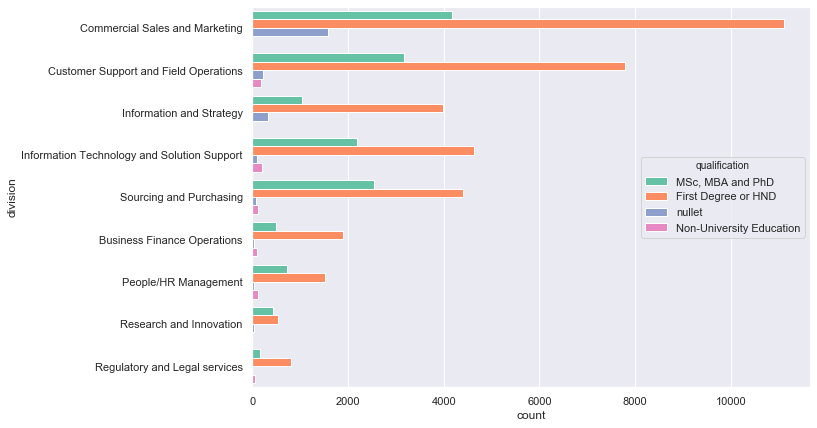

In [20]:

sns.set(rc={'figure.figsize':(10,7)})
sns.set(font_scale=1)
ax = sns.countplot(y="division", hue = "qualification", data=df, saturation=1, dodge=True, palette= 'Set2')

**Non-University Education** has no slot in the Commercial Sales and Marketing, \
Information and Strategy and Research and Innovation

## Age to filter
blox plot of the Age of people

In [21]:
msc = df.where(df.qualification =='MSc, MBA and PhD').dropna(how = 'all')

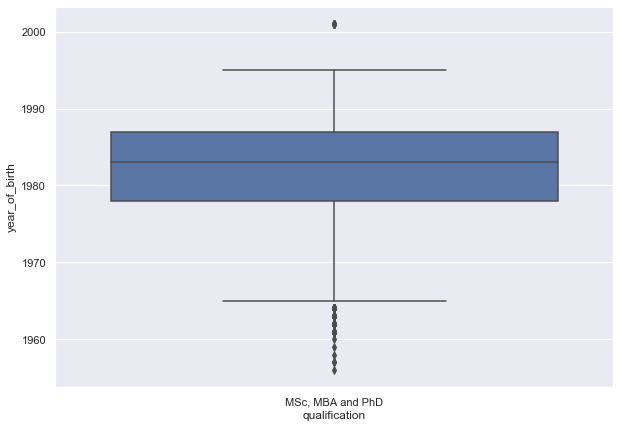

In [22]:
ax = sns.boxplot(x="qualification", y="year_of_birth", data=msc)

In [23]:
#the mean age recruiment

print(msc["year_of_birth"].mean())
print(msc['year_of_birth'].mode())
print(msc['year_of_birth'].median())

msc['year_of_birth'].describe()

1981.6458291457286
0    1987.0
dtype: float64
1983.0


count    14925.000000
mean      1981.645829
std          7.075548
min       1956.000000
25%       1978.000000
50%       1983.000000
75%       1987.000000
max       2001.000000
Name: year_of_birth, dtype: float64

In [24]:
msc["year_of_birth"].unique()

array([1986., 1988., 1989., 1982., 1979., 1971., 1990., 1980., 1983.,
       1975., 1974., 1957., 1987., 1984., 1981., 1985., 1978., 1977.,
       1991., 1972., 1969., 1976., 1964., 1968., 1995., 1970., 1973.,
       1965., 1993., 1963., 1962., 1961., 1967., 1966., 1992., 1994.,
       1956., 1959., 2001., 1958., 1960.])

In [25]:
len(msc["year_of_birth"].unique())

41

Since, 2001 is the max age, which is an outlier: Anyone older than 2001 does not a have MSC

In [26]:
msc['division'].unique()
len(msc['division'].unique())

9

### Okay, wait! 
### Thank God! Let's work with the count plot above
Starting for the division with the least nullet: \
**Regulatory and Legal services**

In [27]:
pd.crosstab((df['division']=='Regulatory and Legal services'), df.qualification)

qualification,First Degree or HND,"MSc, MBA and PhD",Non-University Education,nullet
division,,,,
False,35855,14769,740,2405
True,814,156,65,4


In [28]:
reg = df[df['division']=='Regulatory and Legal services']
reg

,employeeno,division,qualification,gender,channel_of_recruitment,trainings_attended,year_of_birth,last_performance_score,year_of_recruitment,targets_met,previous_award,training_score_average,state_of_origin,foreign_schooled,marital_status,past_disciplinary_action,previous_intradepartmental_movement,no_of_previous_employers,promoted_or_not,age
55,YAK/S/00085,Regulatory and Legal services,First Degree or HND,Male,Agency and others,2,1992,0.0,2018,0,0,57,ANAMBRA,Yes,Married,No,No,1,1,27
150,YAK/S/00209,Regulatory and Legal services,"MSc, MBA and PhD",Male,Direct Internal process,2,1971,12.5,2013,0,1,50,KADUNA,Yes,Married,No,No,0,0,48
186,YAK/S/00258,Regulatory and Legal services,First Degree or HND,Male,Direct Internal process,2,1987,12.5,2015,0,0,56,LAGOS,Yes,Married,No,No,0,0,32
194,YAK/S/00273,Regulatory and Legal services,Non-University Education,Male,Agency and others,2,1993,0.0,2018,0,0,54,RIVERS,Yes,Married,No,No,1,0,26
222,YAK/S/00312,Regulatory and Legal services,Non-University Education,Male,Agency and others,2,1996,12.5,2017,1,0,51,KANO,Yes,Married,No,No,1,0,23
309,YAK/S/00440,Regulatory and Legal services,First Degree or HND,Male,Agency and others,2,1990,7.5,2018,1,0,54,OSUN,Yes,Married,No,No,1,0,29
404,YAK/S/00566,Regulatory and Legal services,First Degree or HND,Male,Agency and others,2,1988,2.5,2013,0,0,58,LAGOS,Yes,Married,No,No,5,0,31
405,YAK/S/00568,Regulatory and Legal services,Non-University Education,Male,Agency and others,2,1994,0.0,2018,1,0,51,KATSINA,Yes,Married,No,No,0,0,25
521,YAK/S/00743,Regulatory and Legal services,"MSc, MBA and PhD",Male,Agency and others,2,1963,7.5,2004,1,0,52,ONDO,Yes,Married,No,No,1,0,56
545,YAK/S/00777,Regulatory and Legal services,First Degree or HND,Female,Agency and others,2,1969,7.5,2015,1,1,47,OSUN,Yes,Married,No,No,3,0,50


In [29]:
reg['gender'].value_counts()

Male      890
Female    149
Name: gender, dtype: int64

In [30]:
nullet_reg = reg.where(reg.qualification == 'nullet').dropna(how='all')
nullet_reg

,employeeno,division,qualification,gender,channel_of_recruitment,trainings_attended,year_of_birth,last_performance_score,year_of_recruitment,targets_met,previous_award,training_score_average,state_of_origin,foreign_schooled,marital_status,past_disciplinary_action,previous_intradepartmental_movement,no_of_previous_employers,promoted_or_not,age
7924,YAK/S/11210,Regulatory and Legal services,nullet,Male,Direct Internal process,2.0,1988.0,12.5,2016.0,0.0,0.0,48.0,FCT,Yes,Single,No,No,2,0.0,31.0
17533,YAK/S/25020,Regulatory and Legal services,nullet,Male,Direct Internal process,2.0,1989.0,7.5,2017.0,1.0,0.0,48.0,ANAMBRA,Yes,Married,No,No,0,0.0,30.0
20539,YAK/S/29315,Regulatory and Legal services,nullet,Male,Direct Internal process,2.0,1974.0,10.0,2013.0,1.0,0.0,48.0,FCT,Yes,Married,No,No,2,0.0,45.0
32213,YAK/S/45979,Regulatory and Legal services,nullet,Male,Direct Internal process,2.0,1988.0,7.5,2015.0,0.0,0.0,51.0,DELTA,Yes,Married,No,No,3,0.0,31.0


In [31]:
nullet_reg.age

7924     31.0
17533    30.0
20539    45.0
32213    31.0
Name: age, dtype: float64

In [32]:
##Let's check for a trend in people who where in the reg div and where recruited through direct internal process
reg[reg.channel_of_recruitment=='Direct Internal process']

,employeeno,division,qualification,gender,channel_of_recruitment,trainings_attended,year_of_birth,last_performance_score,year_of_recruitment,targets_met,previous_award,training_score_average,state_of_origin,foreign_schooled,marital_status,past_disciplinary_action,previous_intradepartmental_movement,no_of_previous_employers,promoted_or_not,age
150,YAK/S/00209,Regulatory and Legal services,"MSc, MBA and PhD",Male,Direct Internal process,2,1971,12.5,2013,0,1,50,KADUNA,Yes,Married,No,No,0,0,48
186,YAK/S/00258,Regulatory and Legal services,First Degree or HND,Male,Direct Internal process,2,1987,12.5,2015,0,0,56,LAGOS,Yes,Married,No,No,0,0,32
638,YAK/S/00900,Regulatory and Legal services,First Degree or HND,Male,Direct Internal process,2,1991,0.0,2018,0,0,55,KOGI,Yes,Single,No,No,1,0,28
1117,YAK/S/01538,Regulatory and Legal services,First Degree or HND,Male,Direct Internal process,2,1989,2.5,2013,0,0,54,KANO,Yes,Married,No,No,1,0,30
1147,YAK/S/01583,Regulatory and Legal services,First Degree or HND,Male,Direct Internal process,2,1972,12.5,2001,0,0,52,LAGOS,Yes,Married,No,Yes,0,0,47
1335,YAK/S/01850,Regulatory and Legal services,First Degree or HND,Male,Direct Internal process,2,1991,12.5,2017,0,0,48,KADUNA,Yes,Single,No,No,1,0,28
1543,YAK/S/02139,Regulatory and Legal services,Non-University Education,Male,Direct Internal process,2,1993,10.0,2017,1,0,55,SOKOTO,Yes,Married,No,No,0,0,26
1593,YAK/S/02224,Regulatory and Legal services,First Degree or HND,Male,Direct Internal process,2,1981,10.0,2014,0,0,55,RIVERS,Yes,Single,No,No,0,0,38
1832,YAK/S/02558,Regulatory and Legal services,"MSc, MBA and PhD",Male,Direct Internal process,2,1977,12.5,2015,0,0,54,KWARA,Yes,Married,No,No,1,0,42
2007,YAK/S/02799,Regulatory and Legal services,First Degree or HND,Male,Direct Internal process,2,1989,7.5,2015,0,0,49,NASSARAWA,Yes,Married,No,No,1,0,30


In [33]:
spec_dir_reg = reg[(reg.last_performance_score <= 12.5) & (reg.channel_of_recruitment == 'Direct Internal process') & (reg.foreign_schooled == 'Yes')]

In [34]:
#ploting a box plot to represent the reg datframe at Direct Internal process recruitment
spec_dir_reg.sample(10)

,employeeno,division,qualification,gender,channel_of_recruitment,trainings_attended,year_of_birth,last_performance_score,year_of_recruitment,targets_met,previous_award,training_score_average,state_of_origin,foreign_schooled,marital_status,past_disciplinary_action,previous_intradepartmental_movement,no_of_previous_employers,promoted_or_not,age
2244,YAK/S/03115,Regulatory and Legal services,First Degree or HND,Male,Direct Internal process,2,1992,7.5,2014,0,0,53,EBONYI,Yes,Married,No,No,1,0,27
11305,YAK/S/37785,Regulatory and Legal services,First Degree or HND,Male,Direct Internal process,2,1991,10.0,2015,1,0,56,LAGOS,Yes,Married,No,No,4,15,28
26770,YAK/S/38178,Regulatory and Legal services,First Degree or HND,Male,Direct Internal process,2,1990,7.5,2017,0,0,53,LAGOS,Yes,Married,No,No,3,0,29
1107,YAK/S/03906,Regulatory and Legal services,First Degree or HND,Male,Direct Internal process,2,1986,12.5,2012,1,0,48,LAGOS,Yes,Married,No,Yes,0,15,33
7662,YAK/S/10841,Regulatory and Legal services,First Degree or HND,Male,Direct Internal process,2,1989,7.5,2016,0,0,55,KADUNA,Yes,Single,No,No,1,0,30
25680,YAK/S/36657,Regulatory and Legal services,First Degree or HND,Male,Direct Internal process,2,1992,7.5,2016,0,0,52,CROSS RIVER,Yes,Married,No,No,2,0,27
37230,YAK/S/53211,Regulatory and Legal services,First Degree or HND,Male,Direct Internal process,2,1985,2.5,2010,0,0,53,DELTA,Yes,Married,No,No,0,0,34
34799,YAK/S/49717,Regulatory and Legal services,First Degree or HND,Male,Direct Internal process,2,1990,5.0,2017,0,0,54,OYO,Yes,Married,No,No,1,0,29
23645,YAK/S/33749,Regulatory and Legal services,First Degree or HND,Male,Direct Internal process,2,1996,0.0,2018,1,0,52,ADAMAWA,Yes,Married,No,No,1,0,23
3572,YAK/S/05027,Regulatory and Legal services,First Degree or HND,Male,Direct Internal process,2,1994,0.0,2018,0,1,89,EKITI,Yes,Married,No,No,1,1,25


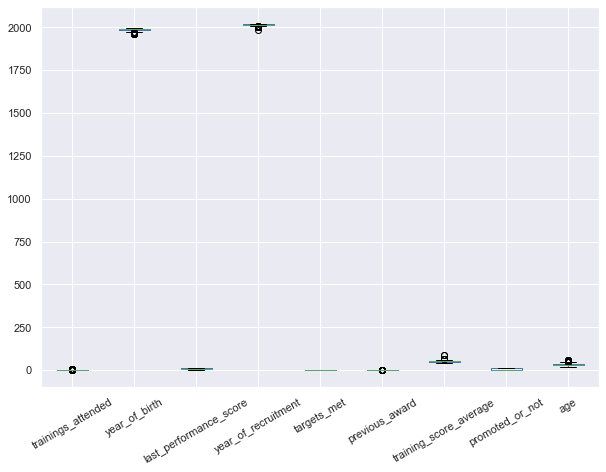

In [35]:
spec_dir_reg.boxplot(rot = 30)

In [36]:
pd.crosstab(spec_dir_reg.qualification, spec_dir_reg.promoted_or_not)

promoted_or_not,0,1,15
qualification,,,
First Degree or HND,212,10,93
"MSc, MBA and PhD",45,2,19
Non-University Education,17,2,4
nullet,4,0,0


In [37]:
##i've columned on giving them a qualification of 'First Degree or HND'

In [38]:
indx = df[(df['division']=='Regulatory and Legal services') &  (df['qualification']=='nullet')].index

#replaces nullet with First Degree or HND'
df.loc[indx, 'qualification'] = 'First Degree or HND'

### Research and Innovation

In [39]:
pd.crosstab((df['division']=='Research and Innovation'), df.qualification)

qualification,First Degree or HND,"MSc, MBA and PhD",Non-University Education,nullet
division,,,,
False,36131,14496,805,2377
True,542,429,0,28


In [40]:
rese = df[df['division']=='Research and Innovation']
rese.qualification.value_counts()

First Degree or HND    542
MSc, MBA and PhD       429
nullet                  28
Name: qualification, dtype: int64

In [41]:
rese.gender.value_counts()

Male      942
Female     57
Name: gender, dtype: int64

In [42]:
rese.channel_of_recruitment	.value_counts()

Agency and others                  555
Direct Internal process            425
Referral and Special candidates     19
Name: channel_of_recruitment, dtype: int64

In [43]:
nullet_res = rese.where(rese.qualification == 'nullet').dropna(how='all')
print(nullet_res.gender.value_counts())
nullet_res.sample(5)

Male    28
Name: gender, dtype: int64


,employeeno,division,qualification,gender,channel_of_recruitment,trainings_attended,year_of_birth,last_performance_score,year_of_recruitment,targets_met,previous_award,training_score_average,state_of_origin,foreign_schooled,marital_status,past_disciplinary_action,previous_intradepartmental_movement,no_of_previous_employers,promoted_or_not,age
2594,YAK/S/03608,Research and Innovation,nullet,Male,Agency and others,3.0,1996.0,0.0,2018.0,0.0,0.0,76.0,ANAMBRA,Yes,Married,No,No,1,0.0,23.0
3160,YAK/S/10775,Research and Innovation,nullet,Male,Agency and others,2.0,1994.0,7.5,2015.0,0.0,0.0,72.0,PLATEAU,Yes,Married,No,No,1,15.0,25.0
6798,YAK/S/22725,Research and Innovation,nullet,Male,Agency and others,3.0,1994.0,0.0,2018.0,0.0,0.0,79.0,IMO,Yes,Married,No,No,1,15.0,25.0
23969,YAK/S/34210,Research and Innovation,nullet,Male,Agency and others,3.0,1995.0,5.0,2016.0,0.0,0.0,77.0,ONDO,Yes,Married,No,No,0,0.0,24.0
35369,YAK/S/50512,Research and Innovation,nullet,Male,Direct Internal process,2.0,1995.0,7.5,2016.0,0.0,0.0,78.0,DELTA,Yes,Married,No,No,1,0.0,24.0


In [44]:
#check where the qual is both msc and first hnd
rese.where(rese.qualification == 'First Degree or HND').dropna(how='all')#.training_score_average.median()
#rese.where(rese.qualification == 'First Degree or HND').dropna(how='all').boxplot(rot = 30)


,employeeno,division,qualification,gender,channel_of_recruitment,trainings_attended,year_of_birth,last_performance_score,year_of_recruitment,targets_met,previous_award,training_score_average,state_of_origin,foreign_schooled,marital_status,past_disciplinary_action,previous_intradepartmental_movement,no_of_previous_employers,promoted_or_not,age
41,YAK/S/00065,Research and Innovation,First Degree or HND,Male,Agency and others,2.0,1987.0,12.5,2014.0,0.0,0.0,79.0,FCT,Yes,Married,No,No,1,0.0,32.0
192,YAK/S/00271,Research and Innovation,First Degree or HND,Male,Agency and others,3.0,1995.0,12.5,2016.0,1.0,0.0,79.0,SOKOTO,Yes,Married,No,Yes,0,0.0,24.0
361,YAK/S/00512,Research and Innovation,First Degree or HND,Male,Direct Internal process,2.0,1991.0,7.5,2016.0,0.0,0.0,75.0,OGUN,Yes,Married,No,No,0,0.0,28.0
369,YAK/S/00523,Research and Innovation,First Degree or HND,Female,Agency and others,2.0,1992.0,0.0,2018.0,1.0,0.0,78.0,FCT,Yes,Single,No,No,0,0.0,27.0
399,YAK/S/00561,Research and Innovation,First Degree or HND,Male,Direct Internal process,3.0,1989.0,12.5,2016.0,1.0,0.0,75.0,JIGAWA,Yes,Married,No,No,1,1.0,30.0
491,YAK/S/00694,Research and Innovation,First Degree or HND,Male,Direct Internal process,4.0,1991.0,12.5,2017.0,0.0,0.0,77.0,OGUN,Yes,Married,No,No,1,0.0,28.0
575,YAK/S/00814,Research and Innovation,First Degree or HND,Male,Direct Internal process,2.0,1986.0,12.5,2012.0,0.0,0.0,81.0,DELTA,Yes,Married,No,No,5,0.0,33.0
676,YAK/S/00955,Research and Innovation,First Degree or HND,Male,Direct Internal process,2.0,1986.0,7.5,2012.0,0.0,0.0,78.0,FCT,Yes,Married,No,No,1,0.0,33.0
778,YAK/S/01089,Research and Innovation,First Degree or HND,Female,Agency and others,2.0,1991.0,12.5,2015.0,1.0,0.0,78.0,LAGOS,Yes,Married,No,No,0,0.0,28.0
851,YAK/S/01185,Research and Innovation,First Degree or HND,Male,Agency and others,2.0,1989.0,7.5,2012.0,0.0,0.0,77.0,ABIA,Yes,Married,No,No,1,0.0,30.0


In [45]:
pd.crosstab(rese.channel_of_recruitment, rese.foreign_schooled)

foreign_schooled,No,Yes
channel_of_recruitment,,
Agency and others,54,501
Direct Internal process,33,392
Referral and Special candidates,2,17


In [46]:
#treating those that where Referral and Special candidates
rese_agency = rese.where(rese.channel_of_recruitment == 'Agency and others').dropna(how='all')

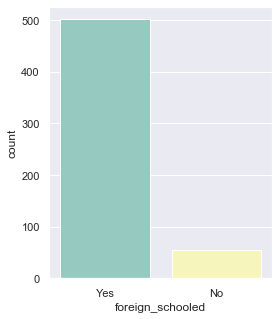

In [47]:
### plot a bar chart to show the guys that where referred
sns.set(rc={'figure.figsize':(4,5)})
ax = sns.countplot(x="foreign_schooled", data=rese_agency, palette="Set3")

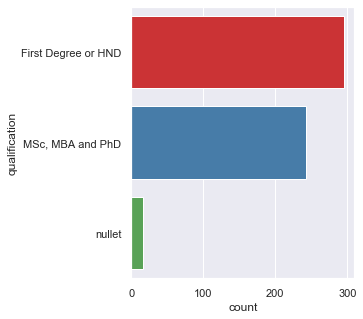

In [48]:

sns.set(rc={'figure.figsize':(4,5)})
ax = sns.countplot(y="qualification", data=rese_agency, palette="Set1")

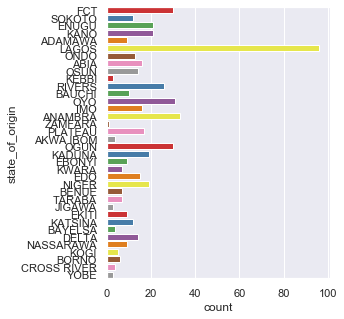

In [49]:
#people from lagos have the highest referal
sns.set(rc={'figure.figsize':(4,5)})
ax = sns.countplot(y="state_of_origin", data=rese_agency, palette="Set1")

In [50]:
dir_phd = rese.where((rese.channel_of_recruitment == 'Direct Internal process') ).dropna(how='all')#.training_score_average.median()
#rese.where(rese.qualification == 'MSc, MBA and PhD').dropna(how='all')
      
#rese.where(rese.qualification == 'MSc, MBA and PhD').dropna(how='all').boxplot(rot = 30)
dir_phd

,employeeno,division,qualification,gender,channel_of_recruitment,trainings_attended,year_of_birth,last_performance_score,year_of_recruitment,targets_met,previous_award,training_score_average,state_of_origin,foreign_schooled,marital_status,past_disciplinary_action,previous_intradepartmental_movement,no_of_previous_employers,promoted_or_not,age
361,YAK/S/00512,Research and Innovation,First Degree or HND,Male,Direct Internal process,2.0,1991.0,7.5,2016.0,0.0,0.0,75.0,OGUN,Yes,Married,No,No,0,0.0,28.0
399,YAK/S/00561,Research and Innovation,First Degree or HND,Male,Direct Internal process,3.0,1989.0,12.5,2016.0,1.0,0.0,75.0,JIGAWA,Yes,Married,No,No,1,1.0,30.0
466,YAK/S/00651,Research and Innovation,"MSc, MBA and PhD",Male,Direct Internal process,3.0,1993.0,10.0,2017.0,0.0,0.0,74.0,EDO,No,Married,No,No,1,0.0,26.0
491,YAK/S/00694,Research and Innovation,First Degree or HND,Male,Direct Internal process,4.0,1991.0,12.5,2017.0,0.0,0.0,77.0,OGUN,Yes,Married,No,No,1,0.0,28.0
575,YAK/S/00814,Research and Innovation,First Degree or HND,Male,Direct Internal process,2.0,1986.0,12.5,2012.0,0.0,0.0,81.0,DELTA,Yes,Married,No,No,5,0.0,33.0
676,YAK/S/00955,Research and Innovation,First Degree or HND,Male,Direct Internal process,2.0,1986.0,7.5,2012.0,0.0,0.0,78.0,FCT,Yes,Married,No,No,1,0.0,33.0
966,YAK/S/01341,Research and Innovation,"MSc, MBA and PhD",Male,Direct Internal process,2.0,1982.0,10.0,2010.0,1.0,0.0,79.0,BENUE,Yes,Married,No,No,1,0.0,37.0
977,YAK/S/01355,Research and Innovation,First Degree or HND,Male,Direct Internal process,3.0,1981.0,7.5,2017.0,1.0,1.0,76.0,LAGOS,Yes,Married,No,No,1,1.0,38.0
982,YAK/S/01362,Research and Innovation,First Degree or HND,Male,Direct Internal process,3.0,1988.0,2.5,2015.0,0.0,0.0,78.0,ANAMBRA,Yes,Married,No,No,0,0.0,31.0
1059,YAK/S/01461,Research and Innovation,"MSc, MBA and PhD",Male,Direct Internal process,2.0,1993.0,10.0,2017.0,0.0,0.0,83.0,OGUN,Yes,Married,No,No,2,0.0,26.0


In [51]:
indx2 = df[(df['division']=='Research and Innovation') &  (df['qualification']=='nullet') &  (df['channel_of_recruitment'] == 'Agency and others')].index

#replaces nullet with First Degree or HND'
df.loc[indx2, 'qualification'] = 'First Degree or HND'

In [52]:
indx3 = df[(df['division']=='Research and Innovation') &  (df['qualification']=='nullet') &  (df['channel_of_recruitment'] == 'Direct Internal process')].index
indx3
#replaces nullet with MSc, MBA and PhD
df.loc[indx3, 'qualification'] = 'MSc, MBA and PhD'

In [53]:
indx4 = df[(df['division']=='Business Finance Operations') &  (df['qualification']=='nullet')].index
df.loc[indx4, 'qualification'] = 'MSc, MBA and PhD'

In [54]:
pd.crosstab(df.division, df.qualification)

qualification,First Degree or HND,"MSc, MBA and PhD",Non-University Education,nullet
division,,,,
Business Finance Operations,1896,534,106,0
Commercial Sales and Marketing,11092,4173,0,1575
Customer Support and Field Operations,7776,3170,176,226
Information Technology and Solution Support,4641,2197,201,99
Information and Strategy,3977,1039,0,336
People/HR Management,1525,733,128,32
Regulatory and Legal services,816,158,65,0
Research and Innovation,559,440,0,0
Sourcing and Purchasing,4391,2546,129,72


### People and HR Management

In [55]:
indx5 = df[(df['division']=='People/HR Management') &  (df['qualification']=='nullet')].index
df.loc[indx5, 'qualification'] = 'Non-University Education'

### Information Technology and Solution Support

In [56]:
indx7= df[(df['division']=='Information Technology and Solution Support') &  (df['qualification']=='nullet')].index
df.loc[indx7, 'qualification'] = 'Non-University Education'

### Sourcing and Purchasing

In [57]:
pd.crosstab(df.division, df.qualification)

qualification,First Degree or HND,"MSc, MBA and PhD",Non-University Education,nullet
division,,,,
Business Finance Operations,1896,533,107,0
Commercial Sales and Marketing,11083,4166,17,1574
Customer Support and Field Operations,7764,3164,194,226
Information Technology and Solution Support,4632,2193,313,0
Information and Strategy,3971,1038,8,335
People/HR Management,1520,731,167,0
Regulatory and Legal services,816,158,65,0
Research and Innovation,558,439,2,0
Sourcing and Purchasing,4385,2543,138,72


In [58]:
indx8= df[(df['division']=='Sourcing and Purchasing') &  (df['qualification']=='nullet')].index
df.loc[indx8, 'qualification'] = 'Non-University Education'

In [59]:
##Information Information and Strategy
df[(df['division']=='Information and Strategy') &  (df['qualification']=='nullet')].head(5)


,employeeno,division,qualification,gender,channel_of_recruitment,trainings_attended,year_of_birth,last_performance_score,year_of_recruitment,targets_met,previous_award,training_score_average,state_of_origin,foreign_schooled,marital_status,past_disciplinary_action,previous_intradepartmental_movement,no_of_previous_employers,promoted_or_not,age
198,YAK/S/00278,Information and Strategy,nullet,Male,Direct Internal process,2,1990,7.5,2015,0,0,77,LAGOS,Yes,Married,No,No,1,0,29
364,YAK/S/00515,Information and Strategy,nullet,Female,Agency and others,2,1992,10.0,2014,0,0,78,RIVERS,Yes,Married,No,No,1,0,27
480,YAK/S/00679,Information and Strategy,nullet,Male,Agency and others,2,1990,10.0,2013,1,0,78,BORNO,Yes,Married,No,No,3,0,29
621,YAK/S/00881,Information and Strategy,nullet,Male,Agency and others,2,1995,12.5,2017,1,0,79,YOBE,Yes,Married,No,No,0,0,24
627,YAK/S/00888,Information and Strategy,nullet,Male,Agency and others,2,1994,0.0,2018,0,0,83,IMO,Yes,Married,No,No,0,0,25


In [60]:
info_stat = df[(df['division']=='Information and Strategy')]


In [61]:
df[(df['division']=='Information and Strategy') &  (df['qualification']=='MSc, MBA and PhD')].sample(5)

,employeeno,division,qualification,gender,channel_of_recruitment,trainings_attended,year_of_birth,last_performance_score,year_of_recruitment,targets_met,previous_award,training_score_average,state_of_origin,foreign_schooled,marital_status,past_disciplinary_action,previous_intradepartmental_movement,no_of_previous_employers,promoted_or_not,age
24396,YAK/S/34812,Information and Strategy,"MSc, MBA and PhD",Male,Agency and others,2,1989,7.5,2010,1,0,73,BAUCHI,Yes,Married,No,No,0,1,30
12491,YAK/S/17761,Information and Strategy,"MSc, MBA and PhD",Male,Agency and others,2,1989,10.0,2016,0,0,78,ANAMBRA,Yes,Not_Sure,No,No,1,0,30
21533,YAK/S/30731,Information and Strategy,"MSc, MBA and PhD",Male,Direct Internal process,2,1973,7.5,2016,0,0,73,PLATEAU,Yes,Married,No,No,1,0,46
23129,YAK/S/33017,Information and Strategy,"MSc, MBA and PhD",Male,Agency and others,3,1975,12.5,1996,1,0,81,EDO,Yes,Married,No,No,2,1,44
17919,YAK/S/25567,Information and Strategy,"MSc, MBA and PhD",Male,Direct Internal process,2,1981,10.0,2016,1,0,77,FCT,Yes,Married,No,No,1,0,38


In [62]:
#check for people with previous awards 
pd.crosstab(info_stat.division,info_stat.previous_award )

previous_award,0,1
division,,
Information and Strategy,5222,130


In [63]:
df[(df['division']=='Information and Strategy') &  (df['qualification']=='Non-University Education')]

,employeeno,division,qualification,gender,channel_of_recruitment,trainings_attended,year_of_birth,last_performance_score,year_of_recruitment,targets_met,previous_award,training_score_average,state_of_origin,foreign_schooled,marital_status,past_disciplinary_action,previous_intradepartmental_movement,no_of_previous_employers,promoted_or_not,age
177,YAK/S/00244,Information and Strategy,Non-University Education,Male,Direct Internal process,2,1991,7.5,2015,0,0,76,FCT,Yes,Married,No,No,1,0,28
3041,YAK/S/04248,Information and Strategy,Non-University Education,Male,Direct Internal process,4,1993,7.5,2013,0,0,73,IMO,No,Married,No,No,1,0,26
4932,YAK/S/06972,Information and Strategy,Non-University Education,Female,Agency and others,2,1989,7.5,2011,1,0,78,LAGOS,No,Married,No,No,1,0,30
8817,YAK/S/12493,Information and Strategy,Non-University Education,Male,Direct Internal process,2,1989,2.5,2013,0,0,75,AKWA IBOM,Yes,Not_Sure,No,No,3,0,30
11343,YAK/S/16112,Information and Strategy,Non-University Education,Male,Agency and others,3,1990,10.0,2017,1,0,72,LAGOS,Yes,Married,No,No,0,0,29
12261,YAK/S/17439,Information and Strategy,Non-University Education,Male,Direct Internal process,2,1993,12.5,2017,1,0,74,FCT,Yes,Married,No,No,5,0,26
13165,YAK/S/18740,Information and Strategy,Non-University Education,Male,Direct Internal process,2,1990,0.0,2018,0,0,78,KATSINA,Yes,Married,No,No,1,0,29
13276,YAK/S/18902,Information and Strategy,Non-University Education,Male,Agency and others,2,1991,10.0,2015,0,0,79,OGUN,Yes,Married,No,No,0,0,28
5486,YAK/S/18468,Information and Strategy,Non-University Education,Male,Agency and others,3,1990,5.0,2013,0,0,80,ENUGU,Yes,Not_Sure,No,No,1,15,29
6211,YAK/S/20849,Information and Strategy,Non-University Education,Male,Direct Internal process,2,1992,2.5,2018,0,0,74,ANAMBRA,Yes,Single,No,No,1,15,27


In [64]:
index9 = df[(df['division']=='Information and Strategy') &  (df['qualification']=='nullet') &  (df['previous_award'] == 1)].index
index10 = df[(df['division']=='Information and Strategy') &  (df['qualification']=='nullet') &  (df['targets_met'] ==1 )].index

df.loc[index9, 'qualification'] = 'MSc, MBA and PhD'
df.loc[index10, 'qualification'] = 'First Degree or HND'

### Information and Strategy

In [65]:
pd.crosstab(df.division, df.qualification)

qualification,First Degree or HND,"MSc, MBA and PhD",Non-University Education,nullet
division,,,,
Business Finance Operations,1896,532,108,0
Commercial Sales and Marketing,11086,4158,23,1573
Customer Support and Field Operations,7766,3153,203,226
Information Technology and Solution Support,4630,2191,317,0
Information and Strategy,4092,1040,15,205
People/HR Management,1520,728,170,0
Regulatory and Legal services,817,157,65,0
Research and Innovation,558,439,2,0
Sourcing and Purchasing,4385,2536,217,0


In [66]:
pd.crosstab(info_stat.division,info_stat.channel_of_recruitment)

channel_of_recruitment,Agency and others,Direct Internal process,Referral and Special candidates
division,,,
Information and Strategy,2973,2296,83


In [67]:
pd.crosstab(info_stat.qualification, info_stat.channel_of_recruitment== 'Referral and Special candidates')

channel_of_recruitment,False,True
qualification,,
First Degree or HND,3882,83
"MSc, MBA and PhD",1037,0
Non-University Education,15,0
nullet,335,0


In [68]:
pd.crosstab(info_stat.qualification,info_stat.channel_of_recruitment)

channel_of_recruitment,Agency and others,Direct Internal process,Referral and Special candidates
qualification,,,
First Degree or HND,2179,1703,83
"MSc, MBA and PhD",597,440,0
Non-University Education,7,8,0
nullet,190,145,0


In [69]:
index11 = df[(df['division']=='Information and Strategy') &  (df['qualification']=='nullet') &  (df['channel_of_recruitment'] == 'Agency and others' )].index
index12 = df[(df['division']=='Information and Strategy') &  (df['qualification']=='nullet') &  (df['channel_of_recruitment'] == 'Direct Internal process' )].index

df.loc[index11, 'qualification'] = 'MSc, MBA and PhD'
df.loc[index12, 'qualification'] = 'First Degree or HND'

In [70]:
pd.crosstab(df.division, df.qualification)

qualification,First Degree or HND,"MSc, MBA and PhD",Non-University Education,nullet
division,,,,
Business Finance Operations,1895,534,107,0
Commercial Sales and Marketing,11072,4174,23,1571
Customer Support and Field Operations,7757,3163,203,225
Information Technology and Solution Support,4629,2193,316,0
Information and Strategy,4171,1166,15,0
People/HR Management,1521,727,170,0
Regulatory and Legal services,816,158,65,0
Research and Innovation,556,441,2,0
Sourcing and Purchasing,4382,2539,217,0


### Commercial Sales and Marketing

In [71]:
csm  = df[(df['division']=='Commercial Sales and Marketing')]
csm.sample(10)

,employeeno,division,qualification,gender,channel_of_recruitment,trainings_attended,year_of_birth,last_performance_score,year_of_recruitment,targets_met,previous_award,training_score_average,state_of_origin,foreign_schooled,marital_status,past_disciplinary_action,previous_intradepartmental_movement,no_of_previous_employers,promoted_or_not,age
10657,YAK/S/15109,Commercial Sales and Marketing,First Degree or HND,Male,Agency and others,3,1990,2.5,2017,0,0,35,ONDO,No,Married,No,No,1,0,29
3205,YAK/S/10922,Commercial Sales and Marketing,"MSc, MBA and PhD",Male,Agency and others,2,1981,10.0,2004,0,0,47,OGUN,Yes,Married,No,No,1,15,38
12588,YAK/S/17909,Commercial Sales and Marketing,First Degree or HND,Male,Agency and others,3,1992,2.5,2016,0,0,41,BORNO,Yes,Married,No,No,0,0,27
13100,YAK/S/43704,Commercial Sales and Marketing,First Degree or HND,Male,Direct Internal process,2,1969,7.5,1998,0,0,38,PLATEAU,Yes,Married,No,No,3,15,50
36122,YAK/S/51622,Commercial Sales and Marketing,First Degree or HND,Male,Direct Internal process,2,1992,2.5,2016,0,0,43,EDO,Yes,Single,No,Yes,4,0,27
755,YAK/S/02660,Commercial Sales and Marketing,First Degree or HND,Male,Agency and others,4,1995,2.5,2015,0,0,44,KANO,Yes,Not_Sure,No,No,0,15,24
27988,YAK/S/39949,Commercial Sales and Marketing,First Degree or HND,Male,Agency and others,2,1986,7.5,2011,0,0,41,TARABA,Yes,Single,No,No,0,0,33
1238,YAK/S/04357,Commercial Sales and Marketing,First Degree or HND,Male,Direct Internal process,2,1985,12.5,2012,1,0,41,NASSARAWA,Yes,Married,No,No,5,15,34
16982,YAK/S/24241,Commercial Sales and Marketing,nullet,Female,Agency and others,2,1975,2.5,2009,0,0,41,LAGOS,Yes,Married,No,No,5,0,44
1015,YAK/S/03612,Commercial Sales and Marketing,First Degree or HND,Female,Direct Internal process,2,1979,12.5,2013,1,0,44,BORNO,No,Married,No,No,1,15,40


In [72]:
pd.crosstab(csm.qualification, csm.channel_of_recruitment)

channel_of_recruitment,Agency and others,Direct Internal process,Referral and Special candidates
qualification,,,
First Degree or HND,6039,4804,229
"MSc, MBA and PhD",2346,1806,22
Non-University Education,10,13,0
nullet,895,668,8


In [73]:
index13 = df[(df['division']=='Commercial Sales and Marketing') &  (df['qualification'] == 'nullet') &  (df['channel_of_recruitment'] == 'Referral and Special candidates' )].index
df.loc[index13, 'qualification'] = 'First Degree or HND'

In [74]:
pd.crosstab(csm.qualification, csm.channel_of_recruitment)

channel_of_recruitment,Agency and others,Direct Internal process,Referral and Special candidates
qualification,,,
First Degree or HND,6039,4804,229
"MSc, MBA and PhD",2346,1806,22
Non-University Education,10,13,0
nullet,895,668,8


In [75]:
pd.crosstab(df.division, df.qualification)

qualification,First Degree or HND,"MSc, MBA and PhD",Non-University Education,nullet
division,,,,
Business Finance Operations,1895,534,107,0
Commercial Sales and Marketing,11080,4174,23,1563
Customer Support and Field Operations,7757,3163,203,225
Information Technology and Solution Support,4629,2193,316,0
Information and Strategy,4171,1166,15,0
People/HR Management,1521,727,170,0
Regulatory and Legal services,816,158,65,0
Research and Innovation,556,441,2,0
Sourcing and Purchasing,4383,2538,217,0


In [76]:
pd.crosstab(csm.qualification, csm.channel_of_recruitment)

channel_of_recruitment,Agency and others,Direct Internal process,Referral and Special candidates
qualification,,,
First Degree or HND,6039,4804,229
"MSc, MBA and PhD",2346,1806,22
Non-University Education,10,13,0
nullet,895,668,8


In [77]:
pcsm  = df[(df['division']=='c')]

In [78]:
pd.crosstab(pcsm.qualification, pcsm.channel_of_recruitment)

""


In [79]:
pcsm.sample(10)

ValueError: 'a' must be greater than 0 unless no samples are taken

In [ ]:
df[(df['division']=='Commercial Sales and Marketing') &  (df['channel_of_recruitment']=='Direct Internal process')]

In [80]:
pd.crosstab(df.division, df.qualification)

qualification,First Degree or HND,"MSc, MBA and PhD",Non-University Education,nullet
division,,,,
Business Finance Operations,1895,534,107,0
Commercial Sales and Marketing,11080,4174,23,1563
Customer Support and Field Operations,7757,3163,203,225
Information Technology and Solution Support,4629,2193,316,0
Information and Strategy,4171,1166,15,0
People/HR Management,1521,727,170,0
Regulatory and Legal services,816,158,65,0
Research and Innovation,556,441,2,0
Sourcing and Purchasing,4383,2538,217,0


In [81]:
index14 = df[(df['division']=='Commercial Sales and Marketing') &  (df['qualification'] == 'nullet') &  (df['channel_of_recruitment'] == 'Direct Internal process' ) & (df['targets_met'] == 1)].index
df.loc[index14, 'qualification'] = 'MSc, MBA and PhD'

In [82]:
pd.crosstab(df.division, df.qualification)

qualification,First Degree or HND,"MSc, MBA and PhD",Non-University Education,nullet
division,,,,
Business Finance Operations,1895,534,107,0
Commercial Sales and Marketing,11061,4338,23,1418
Customer Support and Field Operations,7748,3172,203,225
Information Technology and Solution Support,4617,2205,316,0
Information and Strategy,4164,1173,15,0
People/HR Management,1520,728,170,0
Regulatory and Legal services,815,159,65,0
Research and Innovation,555,442,2,0
Sourcing and Purchasing,4376,2545,217,0


In [83]:
index15 = df[(df['division']=='Commercial Sales and Marketing') &  (df['qualification'] == 'nullet') &  (df['channel_of_recruitment'] == 'Direct Internal process' ) & (df['targets_met'] == 0)].index
df.loc[index15, 'qualification'] = 'MSc, MBA and PhD'

In [84]:

index15 = df[(df['division']=='Commercial Sales and Marketing') &  (df['qualification'] == 'nullet') &  (df['channel_of_recruitment'] == 'Agency and others' ) ].index
df.loc[index15, 'qualification'] = 'First Degree or HND'

In [85]:
pd.crosstab(df.division, df.qualification)

qualification,First Degree or HND,"MSc, MBA and PhD",Non-University Education,nullet
division,,,,
Business Finance Operations,1888,544,104,0
Commercial Sales and Marketing,11925,4892,23,0
Customer Support and Field Operations,7728,3200,201,219
Information Technology and Solution Support,4609,2213,316,0
Information and Strategy,4145,1192,15,0
People/HR Management,1525,727,166,0
Regulatory and Legal services,814,162,63,0
Research and Innovation,555,442,2,0
Sourcing and Purchasing,4384,2541,213,0


###  Customer Support and Field Operations

In [86]:
index16 = df[(df['division']=='Customer Support and Field Operations') &  (df['qualification'] == 'nullet')].index
df.loc[index16, 'qualification'] = 'MSc, MBA and PhD'

In [87]:
pd.crosstab(df.division, df.qualification)

qualification,First Degree or HND,"MSc, MBA and PhD",Non-University Education
division,,,
Business Finance Operations,1885,548,103
Commercial Sales and Marketing,11903,4914,23
Customer Support and Field Operations,7712,3435,201
Information Technology and Solution Support,4604,2219,315
Information and Strategy,4134,1203,15
People/HR Management,1521,731,166
Regulatory and Legal services,807,169,63
Research and Innovation,552,445,2
Sourcing and Purchasing,4372,2555,211


In [88]:
df.sample(3)

,employeeno,division,qualification,gender,channel_of_recruitment,trainings_attended,year_of_birth,last_performance_score,year_of_recruitment,targets_met,previous_award,training_score_average,state_of_origin,foreign_schooled,marital_status,past_disciplinary_action,previous_intradepartmental_movement,no_of_previous_employers,promoted_or_not,age
37493,YAK/S/53567,Customer Support and Field Operations,First Degree or HND,Female,Direct Internal process,2,1988,7.5,2012,1,0,49,OGUN,Yes,Married,No,No,1,0,31
28530,YAK/S/40748,Information Technology and Solution Support,"MSc, MBA and PhD",Male,Agency and others,2,1972,12.5,2008,1,0,71,ANAMBRA,Yes,Single,No,Yes,0,0,47
9361,YAK/S/13290,Commercial Sales and Marketing,First Degree or HND,Male,Agency and others,2,1970,12.5,2012,1,0,39,LAGOS,Yes,Married,No,No,0,0,49


In [89]:
#replace all the 

In [90]:
df['no_of_previous_employers'] = df['no_of_previous_employers'].replace('More than 5', 6)

In [91]:
print(len(df.no_of_previous_employers.unique()), ':', df.no_of_previous_employers.unique())

7 : ['0' '1' '4' '3' '2' 6 '5']


In [92]:
#changing all the values in the no_previous_employers column to numeric
df['no_of_previous_employers'] = pd.to_numeric(df["no_of_previous_employers"])

In [93]:
df.no_of_previous_employers.unique()

array([0, 1, 4, 3, 2, 6, 5], dtype=int64)

In [94]:
df.head(3)

,employeeno,division,qualification,gender,channel_of_recruitment,trainings_attended,year_of_birth,last_performance_score,year_of_recruitment,targets_met,previous_award,training_score_average,state_of_origin,foreign_schooled,marital_status,past_disciplinary_action,previous_intradepartmental_movement,no_of_previous_employers,promoted_or_not,age
0,YAK/S/00001,Commercial Sales and Marketing,"MSc, MBA and PhD",Female,Direct Internal process,2,1986,12.5,2011,1,0,41,ANAMBRA,No,Married,No,No,0,0,33
1,YAK/S/00002,Customer Support and Field Operations,Non-University Education,Male,Agency and others,2,1991,12.5,2015,0,0,52,ANAMBRA,Yes,Married,No,No,0,0,28
2,YAK/S/00003,Commercial Sales and Marketing,First Degree or HND,Male,Direct Internal process,2,1987,7.5,2012,0,0,42,KATSINA,Yes,Married,No,No,0,0,32


### Feature Engineering

So, it is time to remove(drop)some features and includes some new ones
**DROP THE FOLLOWING FEATURES**
1. employeeno
2. division
3. qualification(3 bit encoding)
4. gender(2 bit encoding)
5. channel_of_recruitment(3 bit encoding)
6. year_of_birth
7. year_of_recruitment
8. state_of_origin
9. foreign_schooled(2 bit encoding)
10. marital_status (2 bit encoding)
11. past_disciplinary_action (2 bit encoding)
12. previous_intradepartmental_movement(2 bit encoding)
13. no_of_previous_employers.unique (mistakenly added this)


In [95]:
df.drop(columns = ['division', 'year_of_birth',  'state_of_origin'], axis = 1, inplace = True)

In [96]:
#convert the year of recruitment to numbers

In [97]:
def  get_work_year(age):
    return(int(2019)-int(age))

df['working_for'] = df['year_of_recruitment'].map(lambda x: get_work_year(x))

In [98]:
df.head()

,employeeno,qualification,gender,channel_of_recruitment,trainings_attended,last_performance_score,year_of_recruitment,targets_met,previous_award,training_score_average,foreign_schooled,marital_status,past_disciplinary_action,previous_intradepartmental_movement,no_of_previous_employers,promoted_or_not,age,working_for
0,YAK/S/00001,"MSc, MBA and PhD",Female,Direct Internal process,2,12.5,2011,1,0,41,No,Married,No,No,0,0,33,8
1,YAK/S/00002,Non-University Education,Male,Agency and others,2,12.5,2015,0,0,52,Yes,Married,No,No,0,0,28,4
2,YAK/S/00003,First Degree or HND,Male,Direct Internal process,2,7.5,2012,0,0,42,Yes,Married,No,No,0,0,32,7
3,YAK/S/00004,First Degree or HND,Male,Agency and others,3,2.5,2009,0,0,42,Yes,Single,No,No,1,0,37,10
4,YAK/S/00006,First Degree or HND,Male,Direct Internal process,3,7.5,2012,0,0,77,Yes,Married,No,No,1,0,29,7


In [99]:
df.drop(columns = ['year_of_recruitment'], axis = 1, inplace  = True)

In [100]:
df.head(3)

,employeeno,qualification,gender,channel_of_recruitment,trainings_attended,last_performance_score,targets_met,previous_award,training_score_average,foreign_schooled,marital_status,past_disciplinary_action,previous_intradepartmental_movement,no_of_previous_employers,promoted_or_not,age,working_for
0,YAK/S/00001,"MSc, MBA and PhD",Female,Direct Internal process,2,12.5,1,0,41,No,Married,No,No,0,0,33,8
1,YAK/S/00002,Non-University Education,Male,Agency and others,2,12.5,0,0,52,Yes,Married,No,No,0,0,28,4
2,YAK/S/00003,First Degree or HND,Male,Direct Internal process,2,7.5,0,0,42,Yes,Married,No,No,0,0,32,7


In [101]:
df.drop(['division', 'year_of_birth',  'state_of_origin','year_of_recruitment'],axis = 1 ,inplace = True)

KeyError: "['division' 'year_of_birth' 'state_of_origin' 'year_of_recruitment'] not found in axis"

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54808 entries, 0 to 16495
Data columns (total 17 columns):
employeeno                             54808 non-null object
qualification                          54808 non-null object
gender                                 54808 non-null object
channel_of_recruitment                 54808 non-null object
trainings_attended                     54808 non-null int64
last_performance_score                 54808 non-null float64
targets_met                            54808 non-null int64
previous_award                         54808 non-null int64
training_score_average                 54808 non-null int64
foreign_schooled                       54808 non-null object
marital_status                         54808 non-null object
past_disciplinary_action               54808 non-null object
previous_intradepartmental_movement    54808 non-null object
no_of_previous_employers               54808 non-null int64
promoted_or_not                        54

In [103]:
df['is_female'] = np.where((df.gender == 'Female'), 1, 0)

In [104]:
df['schooled_abroad'] = np.where((df.foreign_schooled == 'Yes'), 1, 0)

In [105]:
df['is_married'] = np.where((df.marital_status == 'Married'), 1, 0)

In [106]:
df['was_disciplined'] = np.where((df.past_disciplinary_action == 'Yes'), 1, 0)
df['was_moved'] = np.where((df.previous_intradepartmental_movement == 'Married'), 1, 0)

### One Hot Encoding - Qualification

In [107]:
df = pd.get_dummies(df, columns = ['channel_of_recruitment', 'qualification'])
df.drop(['previous_intradepartmental_movement','past_disciplinary_action','marital_status','foreign_schooled','gender'], axis = 1 ,inplace = True)

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54808 entries, 0 to 16495
Data columns (total 21 columns):
employeeno                                                54808 non-null object
trainings_attended                                        54808 non-null int64
last_performance_score                                    54808 non-null float64
targets_met                                               54808 non-null int64
previous_award                                            54808 non-null int64
training_score_average                                    54808 non-null int64
no_of_previous_employers                                  54808 non-null int64
promoted_or_not                                           54808 non-null int64
age                                                       54808 non-null int64
working_for                                               54808 non-null int64
is_female                                                 54808 non-null int32
schooled_abroad    

In [109]:
#split the train and test data after cleaning
#get all the data set where promotion = 15

df_test = df[df['promoted_or_not'] == 15]
df_train = df[df['promoted_or_not'] != 15]

In [110]:
df_train.sample(5)

,employeeno,trainings_attended,last_performance_score,targets_met,previous_award,training_score_average,no_of_previous_employers,promoted_or_not,age,working_for,...,schooled_abroad,is_married,was_disciplined,was_moved,channel_of_recruitment_Agency and others,channel_of_recruitment_Direct Internal process,channel_of_recruitment_Referral and Special candidates,qualification_First Degree or HND,"qualification_MSc, MBA and PhD",qualification_Non-University Education
12373,YAK/S/17584,2,7.5,0,0,61,1,0,31,4,...,1,1,0,0,0,1,0,1,0,0
5301,YAK/S/07484,3,5.0,0,0,70,1,0,30,8,...,1,1,0,0,1,0,0,0,1,0
28089,YAK/S/40118,3,0.0,1,0,77,4,0,25,1,...,1,1,0,0,1,0,0,1,0,0
816,YAK/S/01144,2,10.0,1,0,44,1,0,31,8,...,1,0,0,0,1,0,0,1,0,0
8839,YAK/S/12520,3,12.5,1,0,75,0,0,41,4,...,1,1,0,0,0,1,0,1,0,0


In [111]:
df_test.head()

,employeeno,trainings_attended,last_performance_score,targets_met,previous_award,training_score_average,no_of_previous_employers,promoted_or_not,age,working_for,...,schooled_abroad,is_married,was_disciplined,was_moved,channel_of_recruitment_Agency and others,channel_of_recruitment_Direct Internal process,channel_of_recruitment_Referral and Special candidates,qualification_First Degree or HND,"qualification_MSc, MBA and PhD",qualification_Non-University Education
0,YAK/S/00005,2,7.5,0,0,65,1,15,43,2,...,1,1,0,0,1,0,0,1,0,0
1,YAK/S/00011,2,0.0,0,0,69,1,15,28,1,...,1,1,0,0,0,1,0,0,0,1
2,YAK/S/00015,2,7.5,0,0,76,1,15,35,7,...,1,1,0,0,0,1,0,0,1,0
3,YAK/S/00016,2,2.5,0,0,52,1,15,35,10,...,0,0,0,0,1,0,0,1,0,0
4,YAK/S/00017,2,7.5,1,0,69,0,15,36,5,...,1,1,0,0,1,0,0,1,0,0


In [112]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16496 entries, 0 to 16495
Data columns (total 21 columns):
employeeno                                                16496 non-null object
trainings_attended                                        16496 non-null int64
last_performance_score                                    16496 non-null float64
targets_met                                               16496 non-null int64
previous_award                                            16496 non-null int64
training_score_average                                    16496 non-null int64
no_of_previous_employers                                  16496 non-null int64
promoted_or_not                                           16496 non-null int64
age                                                       16496 non-null int64
working_for                                               16496 non-null int64
is_female                                                 16496 non-null int32
schooled_abroad    

Dropping the **promoted_or_not** column

In [113]:
df_test.drop(['promoted_or_not'],axis = 1, inplace = True)

C:\Users\NOTEBOOK\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [114]:
df_test

,employeeno,trainings_attended,last_performance_score,targets_met,previous_award,training_score_average,no_of_previous_employers,age,working_for,is_female,schooled_abroad,is_married,was_disciplined,was_moved,channel_of_recruitment_Agency and others,channel_of_recruitment_Direct Internal process,channel_of_recruitment_Referral and Special candidates,qualification_First Degree or HND,"qualification_MSc, MBA and PhD",qualification_Non-University Education
0,YAK/S/00005,2,7.5,0,0,65,1,43,2,0,1,1,0,0,1,0,0,1,0,0
1,YAK/S/00011,2,0.0,0,0,69,1,28,1,0,1,1,0,0,0,1,0,0,0,1
2,YAK/S/00015,2,7.5,0,0,76,1,35,7,0,1,1,0,0,0,1,0,0,1,0
3,YAK/S/00016,2,2.5,0,0,52,1,35,10,0,0,0,0,0,1,0,0,1,0,0
4,YAK/S/00017,2,7.5,1,0,69,0,36,5,0,1,1,0,0,1,0,0,1,0,0
5,YAK/S/00019,2,12.5,1,0,38,1,32,8,0,1,1,0,0,1,0,0,1,0,0
6,YAK/S/00027,2,12.5,1,0,60,1,29,4,0,1,1,0,0,1,0,0,1,0,0
7,YAK/S/00028,2,10.0,0,0,71,1,31,4,0,1,1,0,0,1,0,0,1,0,0
8,YAK/S/00031,2,12.5,1,0,64,1,35,10,0,1,1,0,0,0,1,0,1,0,0
9,YAK/S/00032,3,2.5,0,0,53,1,24,2,0,1,1,0,0,1,0,0,1,0,0


In [115]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38312 entries, 0 to 38311
Data columns (total 21 columns):
employeeno                                                38312 non-null object
trainings_attended                                        38312 non-null int64
last_performance_score                                    38312 non-null float64
targets_met                                               38312 non-null int64
previous_award                                            38312 non-null int64
training_score_average                                    38312 non-null int64
no_of_previous_employers                                  38312 non-null int64
promoted_or_not                                           38312 non-null int64
age                                                       38312 non-null int64
working_for                                               38312 non-null int64
is_female                                                 38312 non-null int32
schooled_abroad    

---------------------------

### Saving the Cleaned Train and Test Dataset in new files

In [116]:
clean_test = df_test.to_csv('cleaned_test.csv')

In [117]:
clean_train = df_train.to_csv('cleaned_train.csv')

--------------------------------
Predcition Notebook Next